<a href="https://colab.research.google.com/github/supriya130114/Next-Growth-Evaluation1/blob/main/Part1_Q2_Review_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement - There are times when a user writes Good, Nice App or any other positive text, in the review and gives 1-star rating. Your goal is to identify the reviews where the semantics of review text does not match rating.
Your goal is to identify such ratings where review text is good, but rating is negative- so that the support team can point this to users.


Importing libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2022-04-21 04:57:32.796 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()



Saving chrome_reviews.csv to chrome_reviews.csv


In [ ]:
data = pd.read_csv('chrome_reviews.csv')
pd.set_option("display.max_columns", None)
display(data.head())

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,19-12-2020,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,19-12-2020,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,19-12-2020,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,19-12-2020,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,19-12-2020,com.android.chrome


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [ ]:
df = data[['Text','Star']]
df.head()

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1


In [ ]:
null_val = [val for val in df.columns if df[val].isnull().any()]
len(null_val)

1

In [ ]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    7203 non-null   object
 1   Star    7204 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.7+ KB


Data Preprocessing

In [ ]:
#import natural language tool kit
import nltk
import re #regular expressions module

nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#declaring porter stemmer
port = PorterStemmer()
def text_cleaner (text): #function to clean text
    cleaned= re.sub('[^a-zA-Z]', " ", text) 
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [port.stem (word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    return cleaned

In [ ]:
df["Cleaned_Text"] = df["Text"].apply(lambda x: text_cleaner(str(x))) #declare cleaned text feature
df["Length"] = df["Text"].apply(lambda x:len(str(x))) #declare length feature
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Text,Star,Cleaned_Text,Length
0,This is very helpfull aap.,5,helpful aap,26
1,Good,3,good,4
2,Not able to update. Neither able to uninstall.,1,abl updat neither abl uninstal,46
3,Nice app,4,nice app,8
4,Many unwanted ads,1,mani unwant ad,17


Data Analysis

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


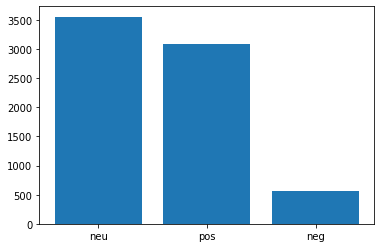

In [ ]:
plot_sentiment_barchart(df['Cleaned_Text'], method='Vader')

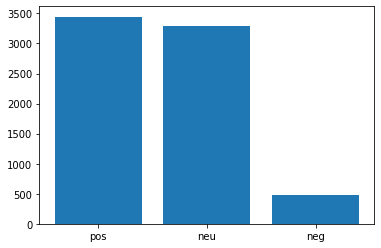

In [ ]:
plot_sentiment_barchart(df['Cleaned_Text'], method='TextBlob')

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df["Vader_Score"] = df["Cleaned_Text"].apply(lambda review:sid.polarity_scores(review))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df["Vader_Compound_Score"]  = df['Vader_Score'].apply(lambda score_dict: score_dict['compound'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df["Result"] = df["Vader_Compound_Score"].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Text,Star,Cleaned_Text,Length,Vader_Score,Vader_Compound_Score,Result
0,This is very helpfull aap.,5,helpful aap,26,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
2,Not able to update. Neither able to uninstall.,1,abl updat neither abl uninstal,46,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,Nice app,4,nice app,8,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive
4,Many unwanted ads,1,mani unwant ad,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [ ]:
df_attention = df[(df.Result == "positive")]
df_attention.head()

,Text,Star,Cleaned_Text,Length,Vader_Score,Vader_Compound_Score,Result
0,This is very helpfull aap.,5,helpful aap,26,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
3,Nice app,4,nice app,8,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive
5,This app good,4,app good,13,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,positive
10,Good,5,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive


In [ ]:
Suggestion = []
for row in df_attention["Star"] :
    if row >= 3 :
         Suggestion.append("No Attention Needed")
    else :
         Suggestion.append("Attention Needed")
            
df_attention["Suggestion"] = Suggestion
df_attention.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Text,Star,Cleaned_Text,Length,Vader_Score,Vader_Compound_Score,Result,Suggestion
0,This is very helpfull aap.,5,helpful aap,26,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive,No Attention Needed
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,No Attention Needed
3,Nice app,4,nice app,8,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive,No Attention Needed
5,This app good,4,app good,13,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,positive,No Attention Needed
10,Good,5,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,No Attention Needed


In [ ]:
df_attention.Suggestion.value_counts()

No Attention Needed    3192
Attention Needed        491
Name: Suggestion, dtype: int64

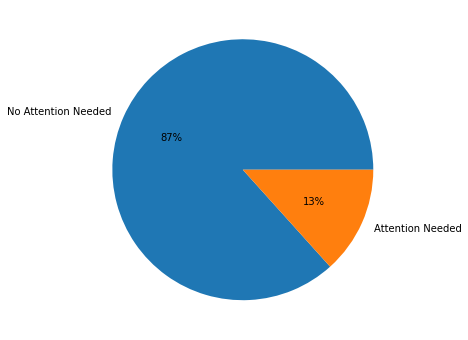

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(df_attention["Suggestion"].value_counts(), labels = df_attention["Suggestion"].value_counts().index, autopct="%.0f%%")
plt.show()